# Neural Network Selection


In [62]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [31]:
data = np.loadtxt("./data/data.csv", delimiter=",")
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

Shape of X_train: (30, 1), Shape of y_train: (30, 1)
Shape of X_cv: (10, 1), Shape of y_cv: (10, 1)
Shape of X_test: (10, 1), Shape of y_test: (10, 1)


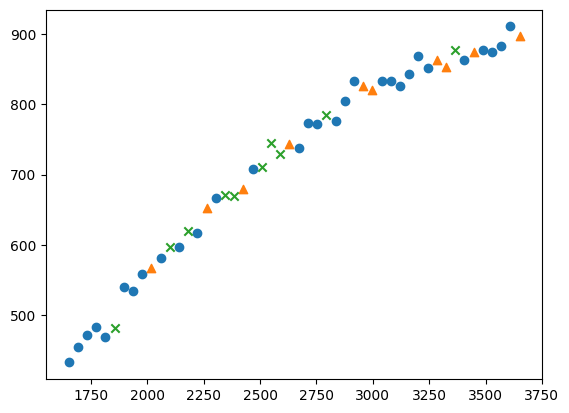

In [32]:
X_train, _X, y_train, _y = train_test_split(X, y, test_size=0.4)

print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")

X_cv, X_test, y_cv, y_test = train_test_split(_X, _y, test_size=0.5)

print(f"Shape of X_cv: {X_cv.shape}, Shape of y_cv: {y_cv.shape}")
print(f"Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}")


plt.scatter(X_train, y_train, marker="o")
plt.scatter(X_cv, y_cv, marker="^")
plt.scatter(X_test, y_test, marker="x")
plt.show()

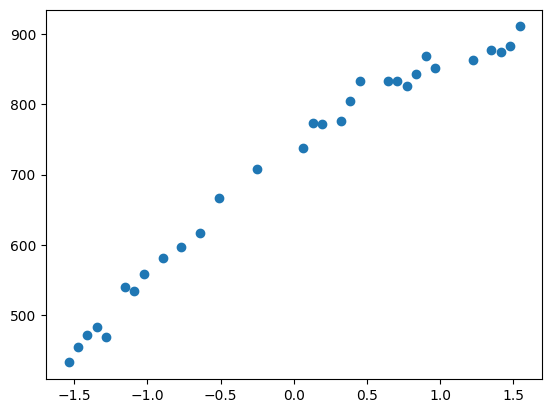

In [33]:
linear_scaler = StandardScaler()
X_train_scaled = linear_scaler.fit_transform(X_train)

plt.scatter(X_train_scaled, y_train)
plt.show()

In [ ]:
model1 = Sequential(
    [
        Input(shape=(1,)),
        Dense(units=25, name="Layer1", activation="relu"),
        Dense(units=15, name="Layer2", activation="relu"),
        Dense(units=1, name="Layer3", activation="linear"),
    ]
)

model2 = Sequential(
    [
        Input(shape=(1,)),
        Dense(units=20, name="Layer1", activation="relu"),
        Dense(units=12, name="Layer2", activation="relu"),
        Dense(units=12, name="Layer3", activation="relu"),
        Dense(units=20, name="Layer4", activation="relu"),
        Dense(units=1, name="Layer5", activation="linear"),
    ]
)

model3 = Sequential(
    [
        Input(shape=(1,)),
        Dense(units=32, name="Layer1", activation="relu"),
        Dense(units=16, name="Layer2", activation="relu"),
        Dense(units=8, name="Layer3", activation="relu"),
        Dense(units=4, name="Layer4", activation="relu"),
        Dense(units=12, name="Layer5", activation="relu"),
        Dense(units=1, name="Layer6", activation="linear"),
    ]
)

models = [model1, model2, model3]

In [ ]:
nn_train_mses = []
nn_cv_mses = []

X_cv_scaled = linear_scaler.transform(X_cv)

for model in models:
    model.compile(optimizer=Adam(learning_rate=0.1), loss="mse")

    model.fit(X_train_scaled, y_train, epochs=300, verbose=0)

    y_train_pred = model.predict(X_train_scaled)
    train_error = mean_squared_error(y_train, y_train_pred) / 2

    y_cv_pred = model.predict(X_cv_scaled)
    cv_error = mean_squared_error(y_cv, y_cv_pred) / 2

    nn_train_mses.append(train_error)
    nn_cv_mses.append(cv_error)

    print(train_error)
    print(cv_error)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
449.88338917440007
459.91968904440785
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
156.65455427392206
139.41397752306915
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
88.20513177163978
69.1746992574812


In [77]:
# Select the model with the lowest CV MSE
model_num = 3
X_test_scaled = linear_scaler.transform(X_test)

# Compute the test MSE
yhat = models[model_num - 1].predict(X_test_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Selected Model: 3
Training MSE: 88.21
Cross Validation MSE: 69.17
Test MSE: 87.99
